3) Apresenta solução dos exercícios a seguir em duas condições distintas:

*   Considerando uma aproximação linear;
*   Considerando a curva BxH fornecida para o imã;

Observação: Perceba que os efeitos da gravidade e atrito NÃO estão sendo considerados neste exercício.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.interpolate import CubicSpline,  interp1d
from scipy.misc import derivative

# Lidando com os warnings
import warnings
warnings.filterwarnings('ignore')

# Parâmetros para plot
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams["font.family"] = "serif"
plt.rcParams['axes.grid'] = False

In [ ]:
# B e H de acordo com o material; esses dados são expeirmentalmente (definidos pelo fabricante)
H = 1000*np.array([-50,-40, -30,-20, -10, 0])
B = np.array([0.06, 0.85,1.08, 1.15, 1.18, 1.2])

#Ponto de operação
H_op = -32e3
B_op = 1.07

#Valores de Br (Magnetização Remanescente) e Hc (Coercitividade)
Hc = H[0]
Br = B[-1]


In [ ]:
numPontos =100
N = 1500
u0 = 4*np.pi*1e-7
W = 3e-2
h = 3e-2
d = 4e-2
D = 10e-2
g = 0.5e-2
ur = Br/(-Hc) # Para caso linear

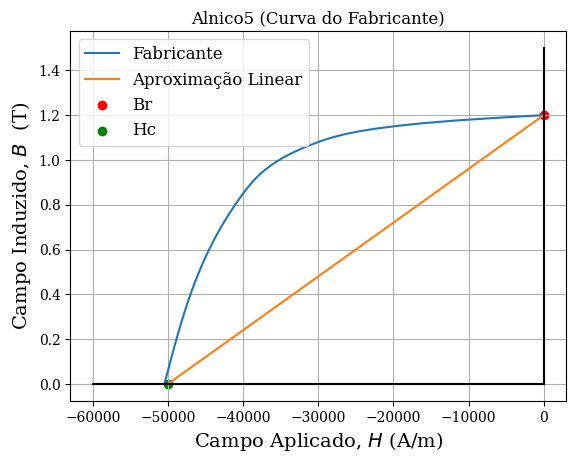

In [ ]:
#Intervalo de variação de Bm
Bm = np.linspace(0, np.max(B), numPontos)

#Determinando a curva por interpolação cúbica
HxB_real = CubicSpline(B, H, bc_type='natural')

#Determinando o Hm Real e Hm Linear
Hm_real = HxB_real(Bm)
Hm_linear = (Bm/ur) + Hc

plt.plot(Hm_real,Bm, label = "Fabricante")
plt.plot(Hm_linear,Bm, label = "Aproximação Linear")
plt.plot([-60000,0], [0,0], color = "black")
plt.plot([0,0], [0,1.5], color = "black")
plt.scatter(Br, 1.2, color='red', label='Br')
plt.scatter(Hc, 0, color='green', label='Hc')
plt.ylabel("Campo Induzido, $B$  (T)")
plt.xlabel("Campo Aplicado, $H$ (A/m)")
plt.title("Alnico5 (Curva do Fabricante)")
plt.legend()
plt.grid()

A) Para o corpo na posição x= h/2, apresente um gráfico da densidade de fluxo no
entreferro em função da corrente aplicada na bobina;

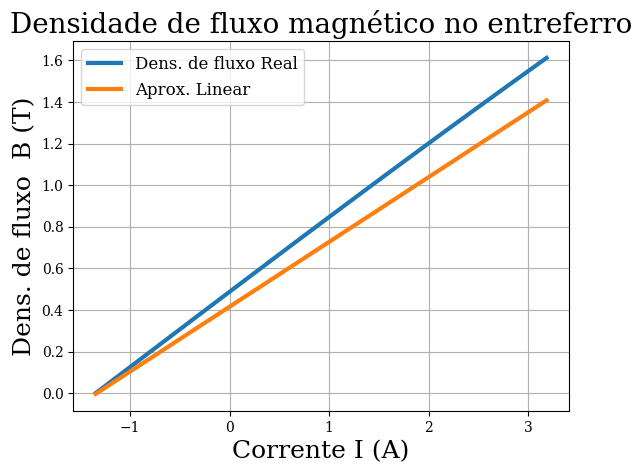

In [ ]:
#Posição
x = h/2

#Áreas
Am = W*D       # Ímã
Ag = (h-x)*D   # Gap (Entreferro)

#Densidade de fluxo magnético no entreferro
Bg = Bm*Am/Ag

#Determinando as correntes pela lei de Àmpere
I_real = (Hm_real*d + g*(Bg/u0))/N
I_linear = (Hm_linear*d + g*(Bg/u0))/N

#Determinando a curva Bg x I por interpolação
BgXI_real = CubicSpline(I_real, Bg, bc_type='natural')
BgXI_linear = CubicSpline(I_linear, Bg, bc_type='natural')

#Determinando a corrente para B = 0
IxBg = CubicSpline(Bg, I_real, bc_type='natural')
I0 = IxBg(0)

#Calcula a corrente maxima para ter precisão na interpolação
IbobMax = (np.max(Hm_real)*d + g*np.max(B)/u0)/N #Para x = 0 -> Ag = Am

#Intervalo de corrente na bobina para integração
I_int = np.linspace(I0, IbobMax, numPontos)

#Determina a densidade de fluxo no entreferro em função de I_int
Bg_real = BgXI_real(I_int)
Bg_linear = BgXI_linear(I_int)

#Plota os gráficos
plt.plot(I_int, Bg_real, label='Dens. de fluxo Real', linewidth = 3)
plt.plot(I_int, Bg_linear, label='Aprox. Linear', linewidth = 3)
plt.title('Densidade de fluxo magnético no entreferro',fontsize=20)
plt.xlabel('Corrente I (A)', fontsize=18)
plt.ylabel('Dens. de fluxo  B (T)', fontsize=18)
plt.legend(fontsize=12)
plt.grid()


B) Considere que é aplicada na bobina uma corrente tal que, para o corpo posição x=h/2, o sistema esteja no ponto de operação normal indicado pelo fabricante do imã.Nessas condições, apresente um gráfico para a força magnética em função da posição x;

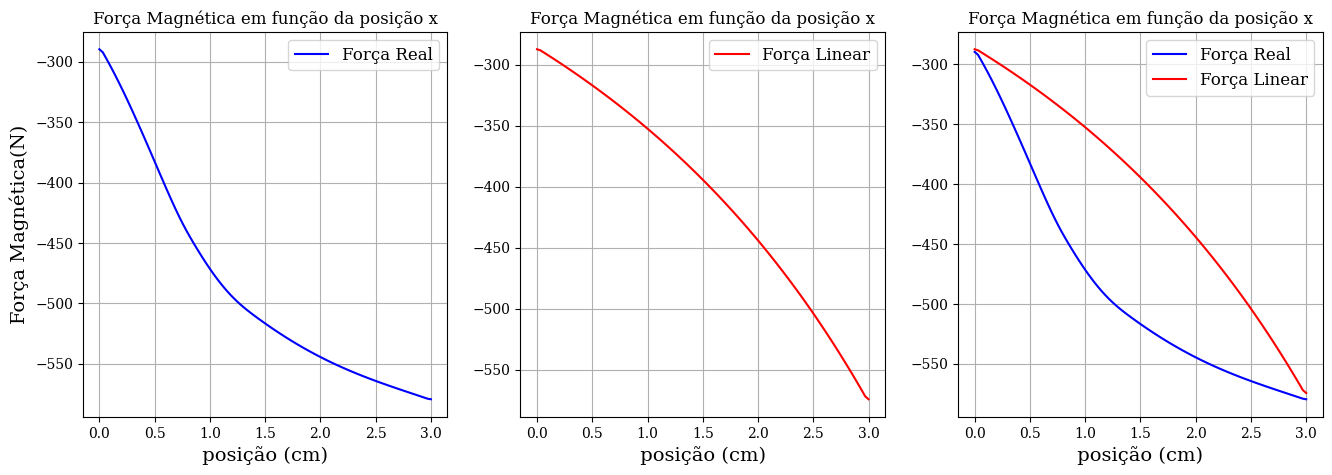

In [ ]:
# Área do gap em função da posição
Ag        = lambda x:(W-x)*D
Hm_linear = lambda Bm:(Bm/ur) + Hc
Hm_real   = CubicSpline(B, H, bc_type='natural')

Bm        = np.linspace(0,1.2,numPontos) # Definindo variação do fluxo do imã
lambdaInt = np.zeros([numPontos]) # aqui vamos colocar o fluxo concatenado ideal

I_real   = np.zeros([numPontos]) # aqui vamos colocar a corrente calculada pro caso real
I_linear = np.zeros([numPontos]) # aqui vamos colocar a corrente calcuada pro caso linear

lambda_real   = np.zeros([numPontos]) # aqui vamos colocar o fluxo calculada pro caso real
lambda_linear = np.zeros([numPontos]) # aqui vamos colocar o fluxo calcuada pro caso linear

wc_real   = np.zeros([numPontos]) # aqui vamos colocar a coenerigia calculada pro caso real
wc_linear = np.zeros([numPontos]) # aqui vamos colocar a coenergia calcuada pro caso linear

# Variação da posição
x = np.linspace(0, h, numPontos)

# Avalia o sistema para cada x
for pos in range(0,numPontos-1):
  # Densidade de fluxo no entreferro
  for b in range(0,numPontos):
    Bm[b]        = (1.2/numPontos)*b # Na simulação, vamos tomar o B de 0 a 1.2 Permite que o x seja estritamente crescente
    lambdaInt[b] =  N*Am*Bm[b] # Fluxo concatenado
    # Iterando a corrente real e linear
    I_real[b]    = (Hm_real(Bm[b])*d   + g*(Bm[b] * Am / Ag(x[pos])) / u0) / N
    I_linear[b]  = (Hm_linear(Bm[b])*d + g*(Bm[b] * Am / Ag(x[pos])) / u0) / N
    #if(pos > 10 and b < 10): print(f'I_real:{I_real[b]}, I_linear:{I_linear[b]}')

  # Função de interpolação do Fluxo concatenado pela Corrente
  Fluxo_x_I_real = CubicSpline(I_real, lambdaInt, bc_type='natural')
  Fluxo_x_I_linear = CubicSpline(I_linear, lambdaInt, bc_type='natural')

  # Corrente de Operação
  Bg_op = B_op*Am/Ag(x)
  I_op  = (H_op*d + g*Bg_op/u0)/N
  Iint  = np.linspace(I0,I_op,numPontos)

  # Valores de do Fluxo concatenado ao longo do vetor I_int
  lambda_real   = Fluxo_x_I_real(I_int)
  lambda_linear = Fluxo_x_I_linear(I_int)

  # Encontrando a co-energia
  wc_real[pos]   = sp.integrate.trapezoid(lambda_real  , I_int)
  wc_linear[pos] = sp.integrate.trapezoid(lambda_linear, I_int)

# Função de interpolação da posição pela co-energia
f_real   = CubicSpline (x,  wc_real , bc_type='natural')
f_linear = CubicSpline (x, wc_linear, bc_type='natural')

# Determinando a força derivando wc em relação a x
Forca_real   = derivative(f_real  , x, dx=W/numPontos)
Forca_linear = derivative(f_linear, x, dx=W/numPontos)

plt.figure(figsize = (16,5))
plt.subplot(1,3,1)
plt.plot(x*100, Forca_real,'b')
plt.legend(["Força Real"])
plt.title('Força Magnética em função da posição x')
plt.xlabel(' posição (cm) ')
plt.ylabel('Força Magnética(N)')
plt.grid()

plt.subplot(1,3,2)
plt.plot(x*100,  Forca_linear,'r')
plt.legend(["Força Linear"])
plt.title('Força Magnética em função da posição x')
plt.xlabel(' posição (cm) ')
plt.grid()

plt.subplot(1,3,3)
plt.plot(x*100, Forca_real,'b')
plt.plot(x*100,  Forca_linear,'r')
plt.legend(["Força Real", "Força Linear"])
plt.title('Força Magnética em função da posição x')
plt.xlabel(' posição (cm) ')
plt.grid()

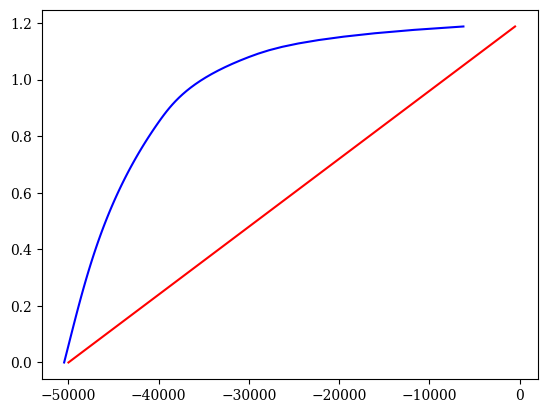

In [ ]:
plt.plot(Hm_real(Bm),Bm, 'b')
plt.plot(Hm_linear(Bm),Bm, 'r')

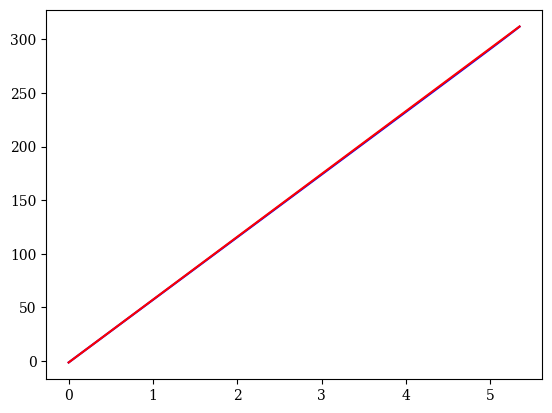

In [ ]:
plt.plot(Fluxo_x_I_real(I_real), I_real, 'b')
plt.plot(Fluxo_x_I_linear(I_linear),I_linear, 'r')

In [ ]:
print(f'Média da Força Real: {np.average(Forca_real)}.\nMédia da Força Linear: {np.average(Forca_linear)}.')

Média da Força Real: -485.96809756848154.
Média da Força Linear: -406.7191866288385.
